In [30]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("../data/user_sessions.csv")
df["timestamp"] = pd.to_datetime(df['timestamp'], errors='coerce')

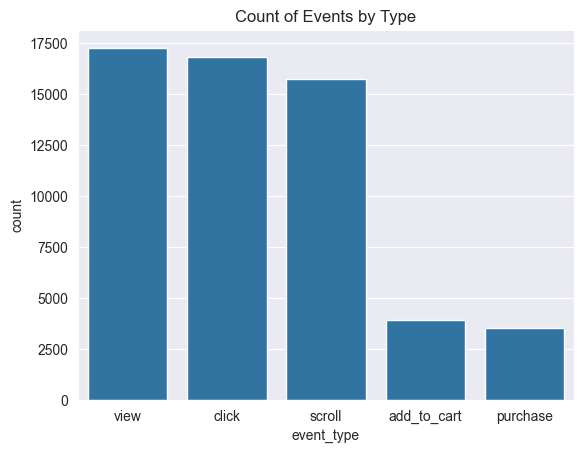

In [32]:
## Event type count 

sns.countplot(data=df, x="event_type", order=df["event_type"].value_counts().index)
plt.title("Count of Events by Type")
plt.show()

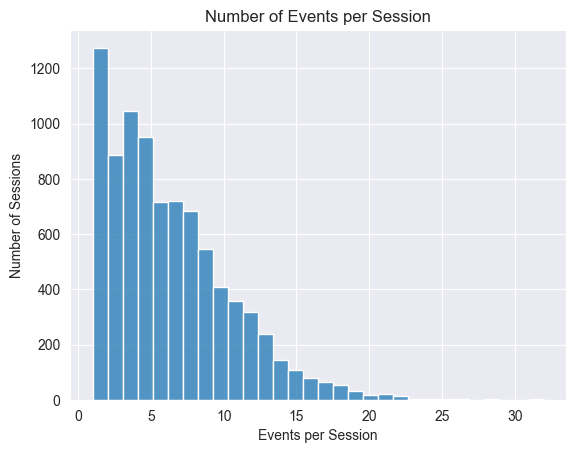

In [33]:
# histogram events per session
events_per_session = df.groupby("session_id").size()
sns.histplot(events_per_session, bins=30, kde=False)
plt.title("Number of Events per Session")
plt.xlabel("Events per Session")
plt.ylabel("Number of Sessions")
plt.show()

## Funnel Analysis
- Proportion of sessions that reach each step in the funnel (view → scroll → click → add_to_cart → purchase)
- Conversion rates

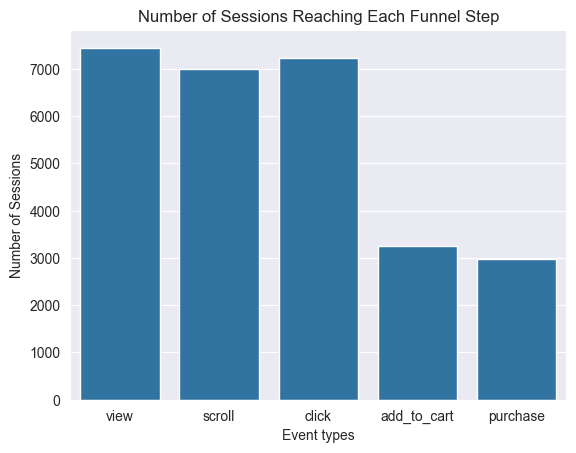

In [34]:
funnel_counts = df.groupby("event_type")["session_id"].nunique().reindex(
    ["view", "scroll", "click", "add_to_cart", "purchase"]
)
sns.barplot(x=funnel_counts.index, y=funnel_counts.values)
plt.title("Number of Sessions Reaching Each Funnel Step")
plt.ylabel("Number of Sessions")
plt.xlabel("Event types")
plt.show()

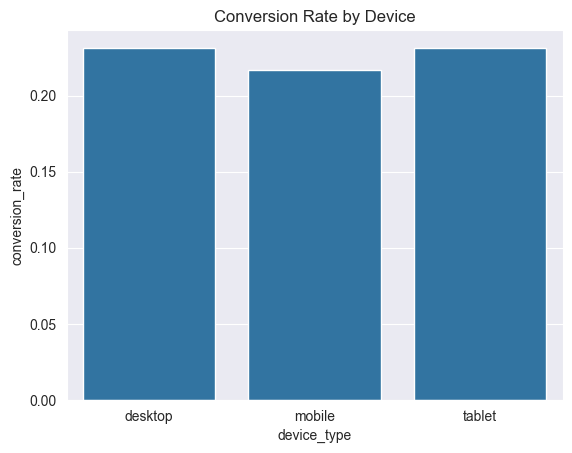

In [35]:
# Conversion by device
conversion_device = df.groupby('device_type')['session_id'].nunique().reset_index()
purchase_device = df[df['event_type']=='purchase'].groupby('device_type')['session_id'].nunique().reset_index()
conversion_device = conversion_device.merge(purchase_device, on='device_type', how='left', suffixes=('_total','_purchase'))
conversion_device['conversion_rate'] = conversion_device['session_id_purchase'] / conversion_device['session_id_total']

sns.barplot(x='device_type', y='conversion_rate', data=conversion_device)
plt.title("Conversion Rate by Device")
plt.show()

## Revenue Analysis
- Total revenue by campaign
- Revenue distribution per purchase

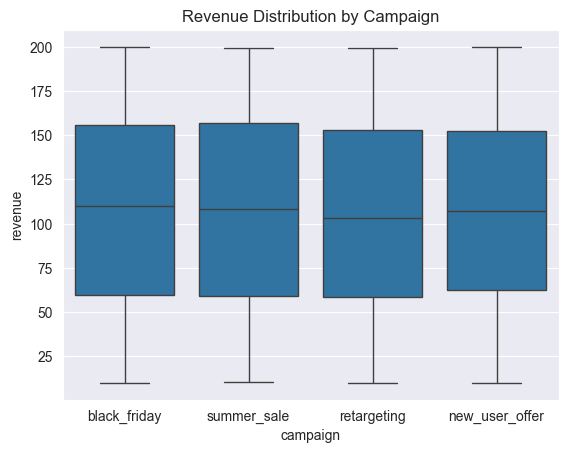

In [36]:
# Boxplot of revenue by campaign
sns.boxplot(data=df[df["revenue"]>0], x="campaign", y="revenue")
plt.title("Revenue Distribution by Campaign")
plt.show()

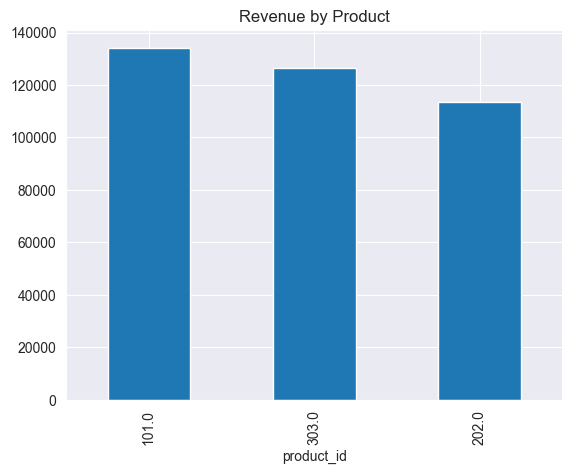

In [37]:
# Revenue by product
revenue_product = df.groupby('product_id')['revenue'].sum().sort_values(ascending=False)
revenue_product.plot(kind='bar', title='Revenue by Product')
plt.show()

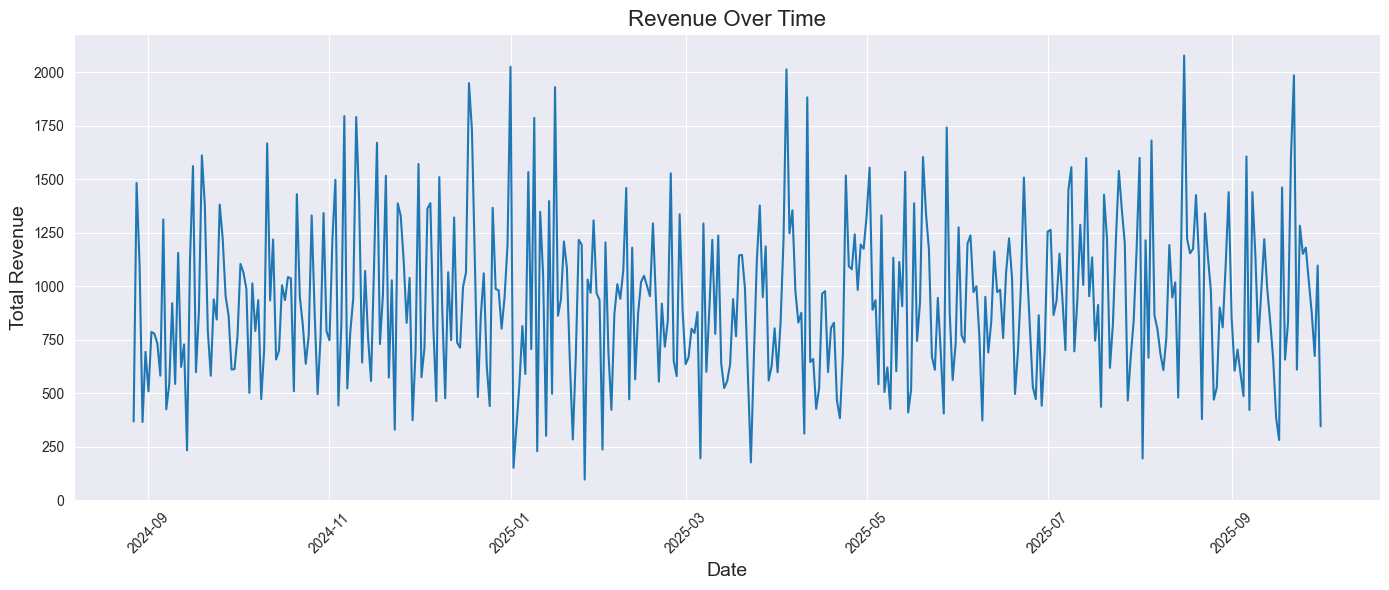

In [38]:
# Revenue over time
df_purchases = df[df["event_type"] == "purchase"]
daily_revenue = df_purchases.groupby(df_purchases["timestamp"].dt.date)["revenue"].sum()

plt.figure(figsize=(14, 6))  # width=14 inches, height=6 inches
daily_revenue.plot()

plt.title("Revenue Over Time", fontsize=16)
plt.ylabel("Total Revenue", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)  # rotate x-axis labels for readability
plt.tight_layout()       # adjust layout to prevent label cutoff
plt.show()

## Session Behavior Analysis
- Average number of events per session
- Average time per session

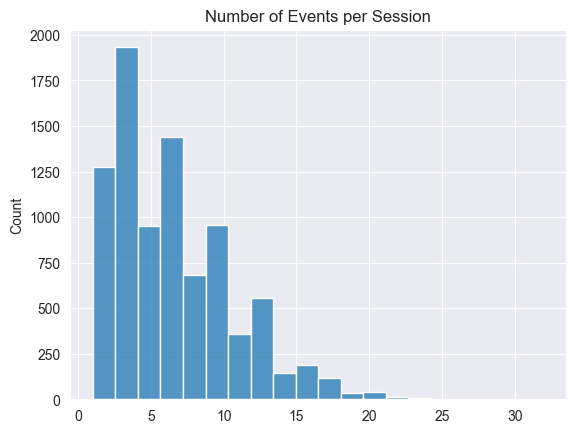

In [39]:
# Events per session
events_per_session = df.groupby('session_id').size()
sns.histplot(events_per_session, bins=20)
plt.title("Number of Events per Session")
plt.show()

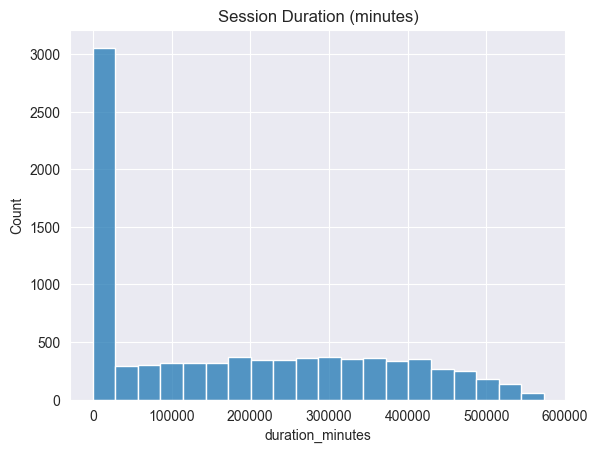

In [40]:
# Session duration
session_times = df.groupby('session_id')['timestamp'].agg(['min','max'])
session_times['duration_minutes'] = (session_times['max'] - session_times['min']).dt.total_seconds() / 60
sns.histplot(session_times['duration_minutes'], bins=20)
plt.title("Session Duration (minutes)")
plt.show()

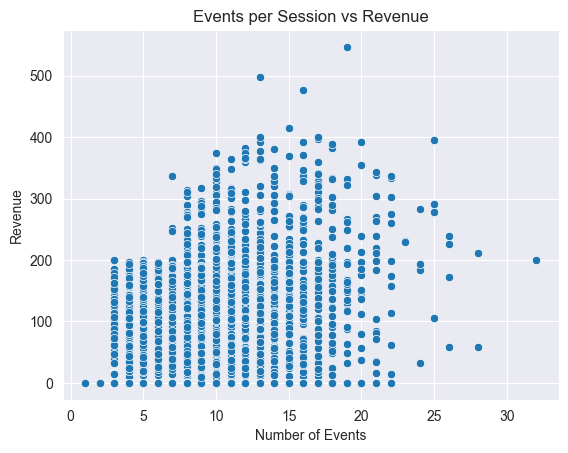

In [41]:
# Events per session vs revenue scatter
events_counts = df.groupby("session_id").size()
revenue_per_session = df.groupby("session_id")["revenue"].sum()
sns.scatterplot(x=events_counts, y=revenue_per_session)
plt.title("Events per Session vs Revenue")
plt.xlabel("Number of Events")
plt.ylabel("Revenue")
plt.show()

## Geography / Device Analysis
- Sessions per country / city
- Device type usage
- Browser and OS distribution

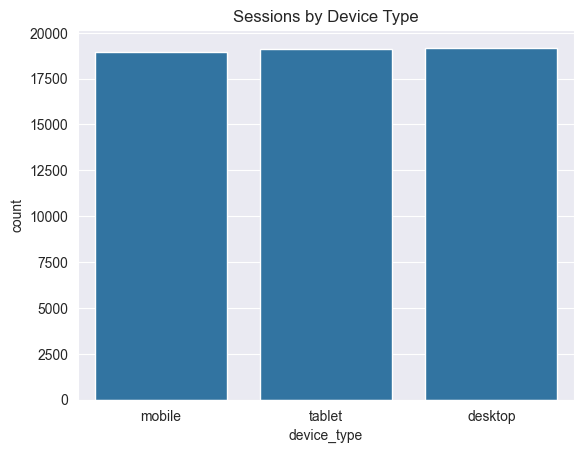

In [42]:
# Bar chart of sessions by device type
sns.countplot(data=df, x="device_type")
plt.title("Sessions by Device Type")
plt.show()

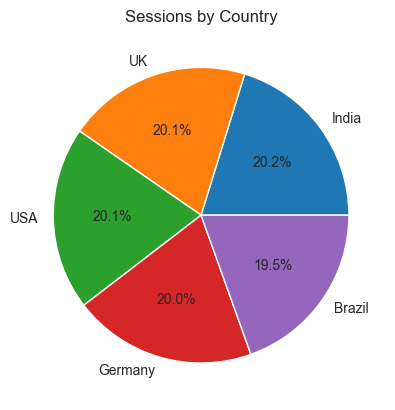

In [43]:
# Pie chart of sessions by country
df["geo_country"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Sessions by Country")
plt.ylabel("")
plt.show()